## Import the libraries

In [1]:
import pickle
import pandas as pd

## Import the final dataset

In [2]:
import pickle
import pandas as pd

# Pickle
# with open('Datasets/positions_and_salary.pkl', 'wb') as f:
#     pickle.dump(position_and_salary, f)

# Unpickle
with open('Datasets/final_df.pkl', 'rb') as f:
    df = pickle.load(f)


In [3]:
df.head(2)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings
0,22020,1630173,Precious Achiuwa,0022001069,2021-05-16,MIA @ DET,MIA,DET,0,1,...,7,3,7,0,2,1,2,3,23,23.112
1,22020,1630173,Precious Achiuwa,0022001062,2021-05-15,MIA @ MIL,MIA,MIL,0,0,...,0,0,0,1,0,0,0,0,2,60.293


## Include double-double and triple-double features

DraftKings criteria:
- Double-double (max 1 per player): 
    - Points, Rebounds, Assists, Blocks, Steals
- Triple-double (max 1 per player): 
    - Points, Rebounds, Assists, Blocks, Steals

In [7]:
def get_double_and_triple_doubles(player_info):
    points = player_info['Points']
    rebounds = player_info['Offensive Rebounds'] + player_info['Defensive Rebounds']
    assists = player_info['Assists']
    blocks = player_info['Blocks']
    steals = player_info['Steals']

    stats = [points, rebounds, assists, blocks, steals]

    cnt = 0
    for stat in stats:
        if int(stat) >= 10:
            cnt += 1

    if cnt >= 3:
        return 'Triple-double'
    elif cnt == 2:
        return 'Double-double'
    else: 
        return None

### Testing the function

In [32]:
# This player, in this game, should get a double-double (assists and points)
df[(df['Assists'] > 10) & (df['Points'] > 10)].head(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings
124,22020,1628389,Bam Adebayo,0022000986,2021-05-04,MIA vs. DAL,MIA,DAL,1,0,...,6,3,6,11,2,0,3,1,11,27.417


In [20]:
test = df[(df['Assists'] > 10) & (df['Points'] > 10)].head(1)
get_double_and_triple_doubles(test)

'Double-double'

In [14]:
# This player, in this game, should get a triple-double (assists, points and rebounds)
df[(df['Assists'] > 10) & (df['Points'] > 10) & (df['Offensive Rebounds'] + df['Defensive Rebounds']> 10)].head(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings
484,22020,203507,Giannis Antetokounmpo,0022000589,2021-03-13,MIL @ WAS,MIL,WAS,0,1,...,8,2,9,11,1,1,4,3,33,50.59


In [21]:
test = df[(df['Assists'] > 10) & (df['Points'] > 10) & (df['Offensive Rebounds'] + df['Defensive Rebounds']> 10)].head(1)
get_double_and_triple_doubles(test)

'Triple-double'

In [22]:
# This player, in this game, should get None
df.iloc[2]

Season ID                                    22020
Player ID                                  1630173
Player Name                       Precious Achiuwa
Game ID                                 0022001050
Game Date                      2021-05-13 00:00:00
Matchup                                MIA vs. PHI
Player Team                                    MIA
Opponent                                       PHI
Home                                             1
Won                                              1
Minutes played                                   2
Field Goals Made                                 0
Field Goals Attempted                            0
Field Goals 3 Points Made                        0
Field Goal 3 Points Attempt                      0
Free Throws Made                                 0
Free Throws Attempt                              0
Offensive Rebounds                               0
Defensive Rebounds                               0
Assists                        

In [24]:
test = df.iloc[2]
print(get_double_and_triple_doubles(test))

None


### Apply the function

In [37]:
df = df.reset_index(drop=True)

results = []

for index, row in df.iterrows():
    results.append(get_double_and_triple_doubles(row))

df['Double/Triple double'] = results

### Check the results

In [39]:
# This player, in this game, should get a double-double (assists and points)
df[(df['Assists'] > 10) & (df['Points'] > 10)].head(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double/Triple double
124,22020,1628389,Bam Adebayo,0022000986,2021-05-04,MIA vs. DAL,MIA,DAL,1,0,...,3,6,11,2,0,3,1,11,27.417,Double-double


In [40]:
# This player, in this game, should get a triple-double (assists, points and rebounds)
df[(df['Assists'] > 10) & (df['Points'] > 10) & (df['Offensive Rebounds'] + df['Defensive Rebounds']> 10)].head(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double/Triple double
484,22020,203507,Giannis Antetokounmpo,0022000589,2021-03-13,MIL @ WAS,MIL,WAS,0,1,...,2,9,11,1,1,4,3,33,50.59,Triple-double


In [41]:
# This player, in this game, should get None
df.iloc[2]

Season ID                                    22020
Player ID                                  1630173
Player Name                       Precious Achiuwa
Game ID                                 0022001050
Game Date                      2021-05-13 00:00:00
Matchup                                MIA vs. PHI
Player Team                                    MIA
Opponent                                       PHI
Home                                             1
Won                                              1
Minutes played                                   2
Field Goals Made                                 0
Field Goals Attempted                            0
Field Goals 3 Points Made                        0
Field Goal 3 Points Attempt                      0
Free Throws Made                                 0
Free Throws Attempt                              0
Offensive Rebounds                               0
Defensive Rebounds                               0
Assists                        

### Create the double-double and triple-double features

In [46]:
df['Double-double'] = df['Double/Triple double'].apply(lambda x: 1 if x == 'Double-double' else 0)
df['Triple-double'] = df['Double/Triple double'].apply(lambda x: 1 if x == 'Triple-double' else 0)

df.head(3)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double/Triple double,Double-double,Triple-double
0,22020,1630173,Precious Achiuwa,0022001069,2021-05-16,MIA @ DET,MIA,DET,0,1,...,0,2,1,2,3,23,23.112,Double-double,1,0
1,22020,1630173,Precious Achiuwa,0022001062,2021-05-15,MIA @ MIL,MIA,MIL,0,0,...,1,0,0,0,0,2,60.293,None,0,0
2,22020,1630173,Precious Achiuwa,0022001050,2021-05-13,MIA vs. PHI,MIA,PHI,1,1,...,0,0,0,0,0,0,0.0,None,0,0


In [48]:
# This player, in this game, should get a double-double (assists and points)
df[(df['Assists'] > 10) & (df['Points'] > 10)].head(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double/Triple double,Double-double,Triple-double
124,22020,1628389,Bam Adebayo,0022000986,2021-05-04,MIA vs. DAL,MIA,DAL,1,0,...,11,2,0,3,1,11,27.417,Double-double,1,0


In [49]:
# This player, in this game, should get a triple-double (assists, points and rebounds)
df[(df['Assists'] > 10) & (df['Points'] > 10) & (df['Offensive Rebounds'] + df['Defensive Rebounds']> 10)].head(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double/Triple double,Double-double,Triple-double
484,22020,203507,Giannis Antetokounmpo,0022000589,2021-03-13,MIL @ WAS,MIL,WAS,0,1,...,11,1,1,4,3,33,50.59,Triple-double,0,1


In [50]:
# This player, in this game, should get None
df.iloc[2]

Season ID                                    22020
Player ID                                  1630173
Player Name                       Precious Achiuwa
Game ID                                 0022001050
Game Date                      2021-05-13 00:00:00
Matchup                                MIA vs. PHI
Player Team                                    MIA
Opponent                                       PHI
Home                                             1
Won                                              1
Minutes played                                   2
Field Goals Made                                 0
Field Goals Attempted                            0
Field Goals 3 Points Made                        0
Field Goal 3 Points Attempt                      0
Free Throws Made                                 0
Free Throws Attempt                              0
Offensive Rebounds                               0
Defensive Rebounds                               0
Assists                        

In [53]:
df.drop(['Double/Triple double'], axis=1, inplace=True)
df.head(2)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double
0,22020,1630173,Precious Achiuwa,0022001069,2021-05-16,MIA @ DET,MIA,DET,0,1,...,7,0,2,1,2,3,23,23.112,1,0
1,22020,1630173,Precious Achiuwa,0022001062,2021-05-15,MIA @ MIL,MIA,MIL,0,0,...,0,1,0,0,0,0,2,60.293,0,0


## Include DraftKings score (model's output)

In [57]:
def get_draftkings_score(player_info):
    points = player_info['Points']
    three_points = player_info['Field Goals 3 Points Made']
    rebounds = player_info['Offensive Rebounds'] + player_info['Defensive Rebounds']
    assists = player_info['Assists']
    steals = player_info['Steals']
    blocks = player_info['Blocks']
    turnovers = player_info['Turnovers']
    double_double = player_info['Double-double']
    triple_double = player_info['Triple-double']

    return points*1 + three_points*0.5 + rebounds*1.25 + assists*1.5 * steals*2 + blocks*2 + turnovers*(-0.5) + double_double*1.5 + triple_double*3

In [59]:
df = df.reset_index(drop=True)

results = []

for index, row in df.iterrows():
    results.append(get_draftkings_score(row))

df['DraftKings score'] = results
df.head(3)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score
0,22020,1630173,Precious Achiuwa,0022001069,2021-05-16,MIA @ DET,MIA,DET,0,1,...,0,2,1,2,3,23,23.112,1,0,38.0
1,22020,1630173,Precious Achiuwa,0022001062,2021-05-15,MIA @ MIL,MIA,MIL,0,0,...,1,0,0,0,0,2,60.293,0,0,2.0
2,22020,1630173,Precious Achiuwa,0022001050,2021-05-13,MIA vs. PHI,MIA,PHI,1,1,...,0,0,0,0,0,0,0.0,0,0,0.0


In [10]:
import pickle
import pandas as pd

# Pickle
# with open('Datasets/final_df_with_output.pkl', 'wb') as f:
#     pickle.dump(df, f)

# Unpickle
with open('Datasets/final_df_with_output.pkl', 'rb') as f:
    df = pickle.load(f)

### Include the next Draftking score

In [26]:
df_with_next = df.iloc[:-1,:]
scores = df['DraftKings score'].values[1:]

In [27]:
df.tail(2)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score
21347,22020,1627826,Ivica Zubac,0022000009,2020-12-25,LAC @ DEN,LAC,DEN,0,1,...,0,0,1,2,4,12,12.181,0,0,13.0
21348,22020,1627826,Ivica Zubac,0022000002,2020-12-22,LAC @ LAL,LAC,LAL,0,1,...,1,1,1,1,4,11,21.917,0,0,23.0


In [28]:
df_with_next.tail(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score
21347,22020,1627826,Ivica Zubac,0022000009,2020-12-25,LAC @ DEN,LAC,DEN,0,1,...,0,0,1,2,4,12,12.181,0,0,13.0


In [29]:
scores[-1]

23.0

In [30]:
print(f'df.shape: {df.shape}')
print(f'df_with_next.shape: {df_with_next.shape}')
print(f'len(scores): {len(scores)}')

df.shape: (21349, 29)
df_with_next.shape: (21348, 29)
len(scores): 21348


In [32]:
df_with_next['Draftkings next game score'] = scores
df_with_next.head()

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score,Draftkings next game score
0,22020,1630173,Precious Achiuwa,0022001069,2021-05-16,MIA @ DET,MIA,DET,0,1,...,2,1,2,3,23,23.112,1,0,38.00,2.00
1,22020,1630173,Precious Achiuwa,0022001062,2021-05-15,MIA @ MIL,MIA,MIL,0,0,...,0,0,0,0,2,60.293,0,0,2.00,0.00
2,22020,1630173,Precious Achiuwa,0022001050,2021-05-13,MIA vs. PHI,MIA,PHI,1,1,...,0,0,0,0,0,0.0,0,0,0.00,5.25
3,22020,1630173,Precious Achiuwa,0022000986,2021-05-04,MIA vs. DAL,MIA,DAL,1,0,...,0,1,0,0,2,29.081,0,0,5.25,0.00
4,22020,1630173,Precious Achiuwa,0022000969,2021-05-02,MIA @ CHA,MIA,CHA,0,1,...,0,0,0,0,0,0.0,0,0,0.00,0.00


In [33]:
import pickle
import pandas as pd

# Pickle
# with open('Datasets/final_df_with_output_next.pkl', 'wb') as f:
#     pickle.dump(df, f)

# Unpickle
# with open('Datasets/final_df_with_output_next.pkl', 'rb') as f:
    # df = pickle.load(f)

## Prepare the 'mean' dataset

In [77]:
print(f"Number of unique values: {df[df['Player Name'] == 'LeBron James']['Game Date'].nunique()}")
print(f"Total values: {df[df['Player Name'] == 'LeBron James']['Game Date'].shape}")

Number of unique values: 45
Total values: (45,)


In [82]:
df[df['Player Name'] == 'LeBron James'].head(3)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score
9873,22020,2544,LeBron James,0022001072,2021-05-16,LAL @ NOP,LAL,NOP,0,1,...,6,3,0,2,0,25,49.527,0,0,80.25
9874,22020,2544,LeBron James,0022001061,2021-05-15,LAL @ IND,LAL,IND,0,1,...,8,0,0,4,2,24,42.436,0,0,31.25
9875,22020,2544,LeBron James,0022000974,2021-05-02,LAL vs. TOR,LAL,TOR,1,0,...,6,0,0,5,2,19,26.493,0,0,26.25


In [85]:
df[df['Player Name'] == 'LeBron James'].sort_values('Game Date').head(3)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score
9917,22020,2544,LeBron James,0022000002,2020-12-22,LAL vs. LAC,LAL,LAC,1,0,...,5,0,0,4,2,22,32.795,0,0,27.75
9916,22020,2544,LeBron James,0022000008,2020-12-25,LAL vs. DAL,LAL,DAL,1,1,...,10,1,0,4,0,22,39.881,1,0,61.75
9915,22020,2544,LeBron James,0022000040,2020-12-27,LAL vs. MIN,LAL,MIN,1,1,...,5,1,0,4,1,18,31.145,0,0,42.75


In [61]:
df.columns

Index(['Season ID', 'Player ID', 'Player Name', 'Game ID', 'Game Date',
       'Matchup', 'Player Team', 'Opponent', 'Home', 'Won', 'Minutes played',
       'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Player Efficiency Ratings',
       'Double-double', 'Triple-double', 'DraftKings score'],
      dtype='object')

In [251]:
def get_simpler_mean_player_stats(player_df, n_games):
    """
    player_df: Pandas DataFrame with the data of a single player
    n_games: Number of records to be used in the mean
    """

    columns_to_drop = ['Season ID', 'Player ID', 'Player Name', 
        'Game ID', 'Game Date', 'Matchup', 'Player Team', 'Opponent', 
        'Home', 'Won', 'DraftKings score']

    player_df = player_df.sort_values('Game Date').copy()
    player_df = player_df.reset_index(drop=True)

    mean_values = []
    reference_dates = []
    draftkings_score = []
    
    for index, row in player_df.iterrows():
        if index+1 >= n_games:
            mean_values.append(player_df.loc[:][index-n_games+1:index+1].drop(columns_to_drop, axis=1).mean())
            reference_dates.append(row['Game Date'])
            draftkings_score.append(row['DraftKings score'])
            
    results_df = pd.DataFrame(data=mean_values)
    results_df['Player ID'] = player_df.loc[0]['Player ID']
    results_df['Player Name'] = player_df.loc[0]['Player Name']
    results_df['Reference Date'] = reference_dates
    results_df['Draftkings score'] = draftkings_score

    results_df.drop(results_df.tail(1).index, inplace=True)
    results_df['Draftkings next game score'] = draftkings_score[1:]

    return results_df

In [252]:
test = get_simpler_mean_player_stats(df[df['Player Name'] == 'LeBron James'], 5)
test.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,...,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Player ID,Player Name,Reference Date,Draftkings score,Draftkings next game score
0,31.2,8.6,18.2,2.2,6.2,4.0,5.6,1.0,6.0,6.8,...,1.2,23.4,37.1238,0.2,0.0,2544,LeBron James,2020-12-30,57.75,102.25
1,32.8,8.8,19.2,2.2,6.0,4.4,5.6,0.8,7.4,7.8,...,0.8,24.2,39.4298,0.2,0.2,2544,LeBron James,2021-01-01,102.25,64.25
2,33.0,9.0,18.8,2.2,5.6,4.0,5.4,0.6,8.8,7.4,...,1.2,24.2,39.1856,0.2,0.2,2544,LeBron James,2021-01-03,64.25,63.00


In [253]:
df[df['Player Name'] == 'LeBron James'].sort_values('Game Date').loc[:][0:5].mean()

C:\Users\danie\AppData\Local\Temp\ipykernel_18336\3563183442.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df['Player Name'] == 'LeBron James'].sort_values('Game Date').loc[:][0:5].mean()
C:\Users\danie\AppData\Local\Temp\ipykernel_18336\3563183442.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Player Name'] == 'LeBron James'].sort_values('Game Date').loc[:][0:5].mean()


Season ID                      4.404044e+23
Player ID                      5.088509e+18
Game ID                        4.400000e+46
Home                           8.000000e-01
Won                            6.000000e-01
Minutes played                 3.120000e+01
Field Goals Made               8.600000e+00
Field Goals Attempted          1.820000e+01
Field Goals 3 Points Made      2.200000e+00
Field Goal 3 Points Attempt    6.200000e+00
Free Throws Made               4.000000e+00
Free Throws Attempt            5.600000e+00
Offensive Rebounds             1.000000e+00
Defensive Rebounds             6.000000e+00
Assists                        6.800000e+00
Steals                         1.000000e+00
Blocks                         4.000000e-01
Turnovers                      3.400000e+00
Personal Fouls                 1.200000e+00
Points                         2.340000e+01
Player Efficiency Ratings      3.712380e+01
Double-double                  2.000000e-01
Triple-double                  0

In [254]:
df[df['Player Name'] == 'LeBron James'].sort_values('Game Date').reset_index(drop=True).loc[:][0:7]

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score
0,22020,2544,LeBron James,0022000002,2020-12-22,LAL vs. LAC,LAL,LAC,1,0,...,5,0,0,4,2,22,32.795,0,0,27.75
1,22020,2544,LeBron James,0022000008,2020-12-25,LAL vs. DAL,LAL,DAL,1,1,...,10,1,0,4,0,22,39.881,1,0,61.75
2,22020,2544,LeBron James,0022000040,2020-12-27,LAL vs. MIN,LAL,MIN,1,1,...,5,1,0,4,1,18,31.145,0,0,42.75
3,22020,2544,LeBron James,0022000045,2020-12-28,LAL vs. POR,LAL,POR,1,0,...,6,2,1,3,2,29,43.575,0,0,78.25
4,22020,2544,LeBron James,0022000060,2020-12-30,LAL @ SAS,LAL,SAS,0,1,...,8,1,1,2,1,26,38.223,0,0,57.75
5,22020,2544,LeBron James,0022000075,2021-01-01,LAL @ SAS,LAL,SAS,0,1,...,10,2,0,4,0,26,44.325,0,1,102.25
6,22020,2544,LeBron James,0022000087,2021-01-03,LAL @ MEM,LAL,MEM,0,1,...,8,1,0,2,2,22,38.66,1,0,64.25


In [255]:
test.tail(1)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,...,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Player ID,Player Name,Reference Date,Draftkings score,Draftkings next game score
39,27.2,8.0,14.8,1.8,5.0,3.4,4.6,1.0,5.2,6.2,...,1.4,21.2,38.8948,0.0,0.0,2544,LeBron James,2021-05-15,31.25,80.25


In [261]:
df[df['Player Name'] == 'LeBron James'].sort_values('Game Date').tail(2)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score
9874,22020,2544,LeBron James,0022001061,2021-05-15,LAL @ IND,LAL,IND,0,1,...,8,0,0,4,2,24,42.436,0,0,31.25
9873,22020,2544,LeBron James,0022001072,2021-05-16,LAL @ NOP,LAL,NOP,0,1,...,6,3,0,2,0,25,49.527,0,0,80.25


In [241]:
players_ids = df['Player ID'].unique()

In [243]:
len(players_ids)

453

In [262]:
mean_5_games_df = pd.DataFrame()

for player_id in players_ids:
    mean_5_games_df = pd.concat((get_simpler_mean_player_stats(df[df['Player ID'] == player_id], 5), mean_5_games_df))
    

In [264]:
mean_5_games_df = mean_5_games_df.sort_values('Reference Date').reset_index(drop=True)
mean_5_games_df.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,...,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Player ID,Player Name,Reference Date,Draftkings score,Draftkings next game score
0,19.2,3.2,4.0,0.0,0.0,4.0,5.0,1.6,1.2,0.8,...,2.4,10.4,27.3124,0.0,0.0,1627826,Ivica Zubac,2020-12-30 00:00:00,26.50,14.50
1,15.6,1.6,4.8,0.8,2.8,1.8,2.4,0.0,2.2,0.2,...,1.8,5.8,16.4550,0.0,0.0,1627752,Taurean Prince,2020-12-30 00:00:00,19.75,10.75
2,24.0,5.2,9.6,3.2,5.2,0.4,0.6,1.4,2.0,1.4,...,1.6,14.0,31.6614,0.0,0.0,1628978,Donte DiVincenzo,2020-12-30 00:00:00,32.25,16.25


In [265]:
mean_10_games_df = pd.DataFrame()

for player_id in players_ids:
    mean_10_games_df = pd.concat((get_simpler_mean_player_stats(df[df['Player ID'] == player_id], 10), mean_10_games_df))
    

In [266]:
mean_10_games_df.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,...,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Player ID,Player Name,Reference Date,Draftkings score,Draftkings next game score
0,17.9,2.7,3.8,0.0,0.0,2.2,2.7,1.4,2.4,0.9,...,2.3,7.6,21.8919,0.0,0.0,1627826,Ivica Zubac,2021-01-08 00:00:00,7.50,18.75
1,16.8,2.5,3.9,0.0,0.0,2.0,2.5,1.6,2.3,0.9,...,2.1,7.0,22.6887,0.0,0.0,1627826,Ivica Zubac,2021-01-10 00:00:00,18.75,17.25
2,17.1,2.6,4.0,0.0,0.0,1.5,1.8,1.7,2.9,1.0,...,2.0,6.7,23.2691,0.0,0.0,1627826,Ivica Zubac,2021-01-13 00:00:00,17.25,19.25


In [6]:
import pickle
import pandas as pd

# Pickle
# with open('Datasets/mean_5_games_df.pkl', 'wb') as f:
#     pickle.dump(mean_5_games_df, f)

# with open('Datasets/mean_10_games_df.pkl', 'wb') as f:
#     pickle.dump(mean_10_games_df, f)

# Unpickle
with open('Datasets/mean_5_games_df.pkl', 'rb') as f:
    mean_5_games_df = pickle.load(f)

with open('Datasets/mean_10_games_df.pkl', 'rb') as f:
    mean_10_games_df = pickle.load(f)

## PCA

### Prepare the dataset

In [44]:
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [34]:
df_with_next.columns

Index(['Season ID', 'Player ID', 'Player Name', 'Game ID', 'Game Date',
       'Matchup', 'Player Team', 'Opponent', 'Home', 'Won', 'Minutes played',
       'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Player Efficiency Ratings',
       'Double-double', 'Triple-double', 'DraftKings score',
       'Draftkings next game score'],
      dtype='object')

In [77]:
columns_to_drop = ['Season ID', 'Player ID', 'Player Name', 'Game ID', 'Game Date',
       'Matchup', 'Player Team', 'Opponent', 'DraftKings score', 'Draftkings next game score']

y = df_with_next['Draftkings next game score']

### Single values

In [40]:
X_single_values = df_with_next.drop(columns_to_drop, axis=1)
X_single_values.head()

,Home,Won,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double
0,0,1,42,10,16,0,0,3,7,3,7,0,2,1,2,3,23,23.112,1,0
1,0,0,2,1,2,0,1,0,0,0,0,1,0,0,0,0,2,60.293,0,0
2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
3,1,0,6,1,2,0,0,0,0,0,1,1,0,1,0,0,2,29.081,0,0
4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0


#### Split the dataset

In [42]:
X_single_values_train, X_single_values_test, y_single_values_train, y_single_values_test = train_test_split(X_single_values, y, test_size=0.2, random_state=0)

#### Standard Scaler

In [43]:
scaler = StandardScaler()
X_single_values_train = scaler.fit_transform(X_single_values_train)
X_single_values_test = scaler.transform(X_single_values_test)

#### PCA

In [62]:
def get_PCA(X_train, X_test, min_acc_variance):
    pca = PCA()
    pca_components = pca.fit(X_train)
    X_train_pca = pca.fit_transform(X_train)
    pca.explained_variance_ratio_

    explained_variance_ratio_acc = []
    sum = 0

    for idx, value in enumerate(pca.explained_variance_ratio_):
        if sum < min_acc_variance:
            n_components = idx
        sum += value
        explained_variance_ratio_acc.append(sum)

    grp = sns.lineplot(y=explained_variance_ratio_acc, x=list(range(len(explained_variance_ratio_acc))), label='Accumulated Variance Ratio')
    grp = sns.lineplot(y=[min_acc_variance]*len(explained_variance_ratio_acc), x=list(range(len(explained_variance_ratio_acc))), label=f'{round(min_acc_variance*100, 2)}% Treshold')
    grp.set(xlabel="Components", ylabel = "Accumulated Variance")

    pca = PCA(n_components=n_components)
    pca_components = pca.fit(X_train)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    print(f'Number of components: {n_components}')
    print(f'Number of components: {round(explained_variance_ratio_acc[n_components]*100, 2)}%')

    return X_train_pca, X_test_pca

Number of components: 9
Number of components: 85.46%


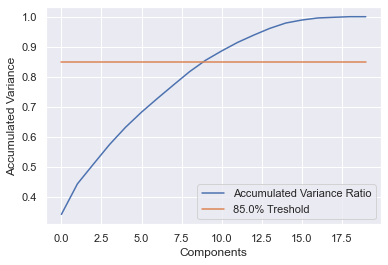

In [63]:
X_single_values_train_pca, X_single_values_test_pca = get_PCA(X_single_values_train, X_single_values_test, 0.85)

In [65]:
X_single_values_train_pca.shape

(17078, 9)

In [68]:
len(X_single_values_train_pca)+len(X_single_values_test_pca)

21348

In [67]:
X_single_values.shape

(21348, 20)

### 5 days mean value

#### Prepare the dataset

In [70]:
mean_5_games_df.columns

Index(['Minutes played', 'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Player Efficiency Ratings',
       'Double-double', 'Triple-double', 'Player ID', 'Player Name',
       'Reference Date', 'Draftkings score', 'Draftkings next game score'],
      dtype='object')

In [80]:
columns_to_drop = ['Player ID', 'Player Name', 'Reference Date', 
    'Draftkings score', 'Draftkings next game score']

y = mean_5_games_df['Draftkings next game score']

In [82]:
X_mean_5_games = mean_5_games_df.drop(columns_to_drop, axis=1)
X_mean_5_games.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double
0,19.2,3.2,4.0,0.0,0.0,4.0,5.0,1.6,1.2,0.8,0.6,1.6,1.0,2.4,10.4,27.3124,0.0,0.0
1,15.6,1.6,4.8,0.8,2.8,1.8,2.4,0.0,2.2,0.2,0.8,0.6,0.4,1.8,5.8,16.4550,0.0,0.0
2,24.0,5.2,9.6,3.2,5.2,0.4,0.6,1.4,2.0,1.4,1.8,0.2,1.6,1.6,14.0,31.6614,0.0,0.0


#### Split the dataset

In [83]:
X_mean_5_games_train, X_mean_5_games_test, y_mean_5_games_train, y_mean_5_games_test = train_test_split(X_mean_5_games, y, test_size=0.2, random_state=0)

#### Standard Scaler

In [84]:
scaler = StandardScaler()
X_mean_5_games_train = scaler.fit_transform(X_mean_5_games_train)
X_mean_5_games_test = scaler.transform(X_mean_5_games_test)

#### PCA

Number of components: 6
Number of components: 88.15%


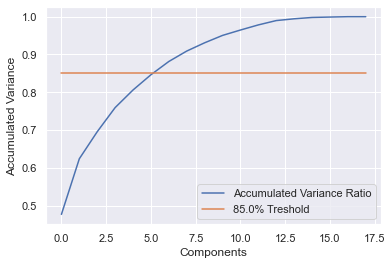

In [85]:
X_mean_5_games_train_pca, X_mean_5_games_test_pca = get_PCA(X_mean_5_games_train, X_mean_5_games_test, 0.85)

### 10 days mean value

#### Prepare the dataset

In [86]:
mean_10_games_df.columns

Index(['Minutes played', 'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Player Efficiency Ratings',
       'Double-double', 'Triple-double', 'Player ID', 'Player Name',
       'Reference Date', 'Draftkings score', 'Draftkings next game score'],
      dtype='object')

In [87]:
columns_to_drop = ['Player ID', 'Player Name', 'Reference Date', 
    'Draftkings score', 'Draftkings next game score']

y = mean_10_games_df['Draftkings next game score']

In [88]:
X_mean_10_games = mean_10_games_df.drop(columns_to_drop, axis=1)
X_mean_10_games.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double
0,17.9,2.7,3.8,0.0,0.0,2.2,2.7,1.4,2.4,0.9,0.4,0.9,1.1,2.3,7.6,21.8919,0.0,0.0
1,16.8,2.5,3.9,0.0,0.0,2.0,2.5,1.6,2.3,0.9,0.4,0.9,1.0,2.1,7.0,22.6887,0.0,0.0
2,17.1,2.6,4.0,0.0,0.0,1.5,1.8,1.7,2.9,1.0,0.4,0.8,0.9,2.0,6.7,23.2691,0.0,0.0


#### Split the dataset

In [89]:
X_mean_10_games_train, X_mean_10_games_test, y_mean_10_games_train, y_mean_10_games_test = train_test_split(X_mean_10_games, y, test_size=0.2, random_state=0)

#### Standard Scaler

In [ ]:
scaler = StandardScaler()
X_mean_10_games_train = scaler.fit_transform(X_mean_10_games_train)
X_mean_10_games_test = scaler.transform(X_mean_10_games_test)

#### PCA

Number of components: 1
Number of components: 91.82%


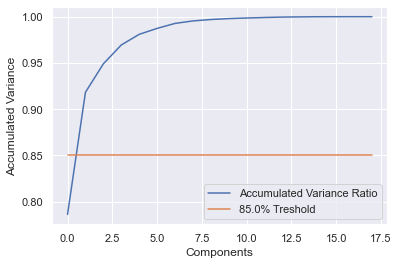

In [90]:
X_mean_10_games_train_pca, X_mean_10_games_test_pca = get_PCA(X_mean_10_games_train, X_mean_10_games_test, 0.85)

## Convert the datasets from Pickle to csv